In [2]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
import scipy.stats as st

In [3]:
# import et lecture export ERP
erp_df = pd.read_excel('Fichier_erp.xlsx')
erp_df.head()

c:\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
# import et lecture export BDD Web
web_df = pd.read_excel('Fichier_web.xlsx')
web_df.head()

c:\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [5]:
# lecture du dataset liaisons
liaisons_ = pd.read_excel('fichier_liaison.xlsx')
liaisons_

c:\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [6]:
# dimensions du fichier ERP
print(f"The ERP dataset has {erp_df.shape[0]} rows and {erp_df.shape[1]} columns")

The ERP dataset has 825 rows and 5 columns


In [7]:
# dimensions du fichier WEB
print(f"The WEB dataset has {web_df.shape[0]} rows and {web_df.shape[1]} columns")

The WEB dataset has 1513 rows and 28 columns


In [8]:
# dimensions du fichier ERP
print(f"The liaisons dataset has {liaisons_.shape[0]} rows and {liaisons_.shape[1]} columns")

The liaisons dataset has 825 rows and 2 columns


In [9]:
web_df = web_df.rename(columns={'sku': 'id_web'})
web_df.sample(20)

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
881,15850,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-04-13 16:14:05,...,bernard-baudry-chinon-rouge-les-granges-2018,2020-08-27 09:30:12,2020-08-27 07:30:12,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1014,13849,0,0,0,0.0,0.0,NaN,NaN,2.0,2019-03-13 14:05:40,...,huile-dolive-extra-vierge-planeta-3x-10cl,2019-05-28 17:00:02,2019-05-28 15:00:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1323,15667,0,0,0,0.0,1.0,taxable,NaN,2.0,2018-04-17 21:53:24,...,domaine-schoenheitz-cremant-dalsace-memoire-gr...,2020-08-06 16:05:02,2020-08-06 14:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
395,15927,0,0,0,0.0,2.0,NaN,NaN,2.0,2018-05-17 12:32:07,...,domaine-la-croix-belle-cotes-de-thongue-rouge-...,2020-08-14 14:45:02,2020-08-14 12:45:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,531,0,0,0,0.0,13.0,taxable,NaN,2.0,2018-07-18 15:58:02,...,champagne-petit-lebrun-fils-blanc-de-blancs-gr...,2020-08-27 15:35:03,2020-08-27 13:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
398,15415,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-15 14:33:42,...,mas-laval-igp-pays-herault-pampres-blanc-2018,2020-07-11 16:45:03,2020-07-11 14:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1414,14712,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-10-09 16:01:48,...,decelle-villa-beaune-rouge-2015,2020-08-20 10:35:02,2020-08-20 08:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
868,14474,0,0,0,0.0,1.0,taxable,NaN,2.0,2018-02-14 14:53:20,...,domino-romano-ribera-camino-2016,2020-06-27 15:25:01,2020-06-27 13:25:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
730,13379,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-05-17 13:36:16,...,domaine-rouge-garance-cotes-du-rhone-villages-...,2019-12-11 09:30:03,2019-12-11 08:30:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [10]:
# types des colonnes
erp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [11]:
# types des colonnes
web_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [12]:
liaisons_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


Vérifier les doublons

In [13]:
#liaisons_.loc[liaisons_['id_web'].duplicated(keep=False),:]
len(liaisons_.loc[liaisons_['product_id'].duplicated(keep=False),:])

0

In [14]:
#liaisons_.loc[liaisons_['id_web'].duplicated(keep=False),:]
len(liaisons_.loc[liaisons_['id_web'].duplicated(keep=False),:])

91

In [15]:
len(erp_df.loc[erp_df['product_id'].duplicated(keep=False),:])

0

In [16]:
len(web_df.loc[web_df['id_web'].duplicated(keep=False),:])

1513

In [17]:
comparison = web_df.loc[web_df['id_web'] == 16209]
comparison[['id_web','total_sales','post_name','tax_status','post_type','post_mime_type']]

,id_web,total_sales,post_name,tax_status,post_type,post_mime_type
3,16209,6.0,maurel-cabardes-tradition-2017,taxable,product,NaN
13,16209,6.0,maurel-cabardes-tradition-2017,NaN,attachment,image/jpeg


In [18]:
# Vérifier si les valeurs 'string' sont dans les 2 exports
differentes_valeurs_liaisons = liaisons_['id_web'].unique()

# Affichez les différentes valeurs
print(differentes_valeurs_liaisons)

[15298 15296 15300 19814 19815 15303 14975 16042 14980 16041 15269 14977
 16044 16043 16449 16045 16030 13127 19816 nan 16029 16039 16318 16275
 16498 16320 16319 15966 15022 15967 15490 16416 11862 15444 15953 12045
 13074 15941 16069 13072 15440 13435 13078 13117 16296 16014 16462 16013
 16180 15676 16120 15564 15675 15378 15813 13416 14905 15767 16505 15683
 16504 15787 14800 15353 15382 15339 11668 13209 15341 13217 304 11641
 1662 1360 15648 1364 7086 1366 15140 16238 16237 15141 14944 14941 14751
 16093 15668 15373 15375 14474 15482 13453 15075 16124 15785 15784 15786
 14332 16210 16211 16209 15629 15583 16160 16166 15783 16560 15747 15746
 16190 16189 16265 16191 16263 15605 16529 15441 13032 16256 16322 16295
 15656 15655 15415 15414 15413 16023 16024 15720 15714 15717 15718 15480
 15213 15672 12599 15758 15829 15759 16585 15306 16497 15261 12657 15403
 15461 16269 13905 16567 15436 14725 15310 15770 16097 15428 15033 16317
 15032 6616 12203 14253 12476 14485 14945 15662 15663 

In [19]:
# Filtrer les chaînes de caractères
chaines = [str(val) for val in web_df['id_web'].unique() if isinstance(val, str)]

# Afficher la liste des chaînes de caractères
print(chaines)


['bon-cadeau-25-euros', '13127-1']


In [20]:
# Filtrer les chaînes de caractères
chaines = [str(val) for val in liaisons_['id_web'].unique() if isinstance(val, str)]

# Afficher la liste des chaînes de caractères
print(chaines)


['bon-cadeau-25-euros', '13127-1', '14680-1']


In [21]:
# Vérifier si les valeurs 'string' sont dans les 2 exports
differentes_valeurs_id_web = web_df['id_web'].unique()

# Affichez les différentes valeurs
print(len(differentes_valeurs_id_web))

715


In [22]:
differentes_valeurs_product_id = erp_df['product_id'].unique()

# Affichez les différentes valeurs
print(len(differentes_valeurs_product_id))

825


In [23]:
# méthode .isna() pour obtenir la somme des valeurs manquantes pour chaque colonne
web_df.isna().sum()

id_web                     85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [24]:
# pour afficher uniquement les variables qui ont des valeurs manquantes
nb_na = web_df.isnull().sum()
nb_na[nb_na>0]

id_web                     85
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [25]:
# méthode .isna() pour obtenir la somme des valeurs manquantes pour chaque colonne
erp_df.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [26]:
# méthode .isna() pour obtenir la somme des valeurs manquantes pour chaque colonne
liaisons_.isna().sum()

product_id     0
id_web        91
dtype: int64

In [27]:
# pour afficher uniquement les variables qui ont des valeurs manquantes
nb_na = liaisons_.isnull().sum()
nb_na[nb_na>0]

id_web    91
dtype: int64

In [28]:
# filtrer web_df sur 'product'
web_df = web_df[web_df['post_type'] == 'product']
web_df.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,12857,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
9,14106,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-06-08 09:54:21,...,stephane-tissot-chateau-chalon-2011,2020-05-29 17:35:03,2020-05-29 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [29]:
# pour afficher uniquement les variables qui ont des valeurs manquantes
nb_na = web_df.isnull().sum()
nb_na[nb_na>0]

id_web                     2
tax_class                716
post_content             716
post_password            716
post_content_filtered    716
post_mime_type           716
dtype: int64

<Axes: >

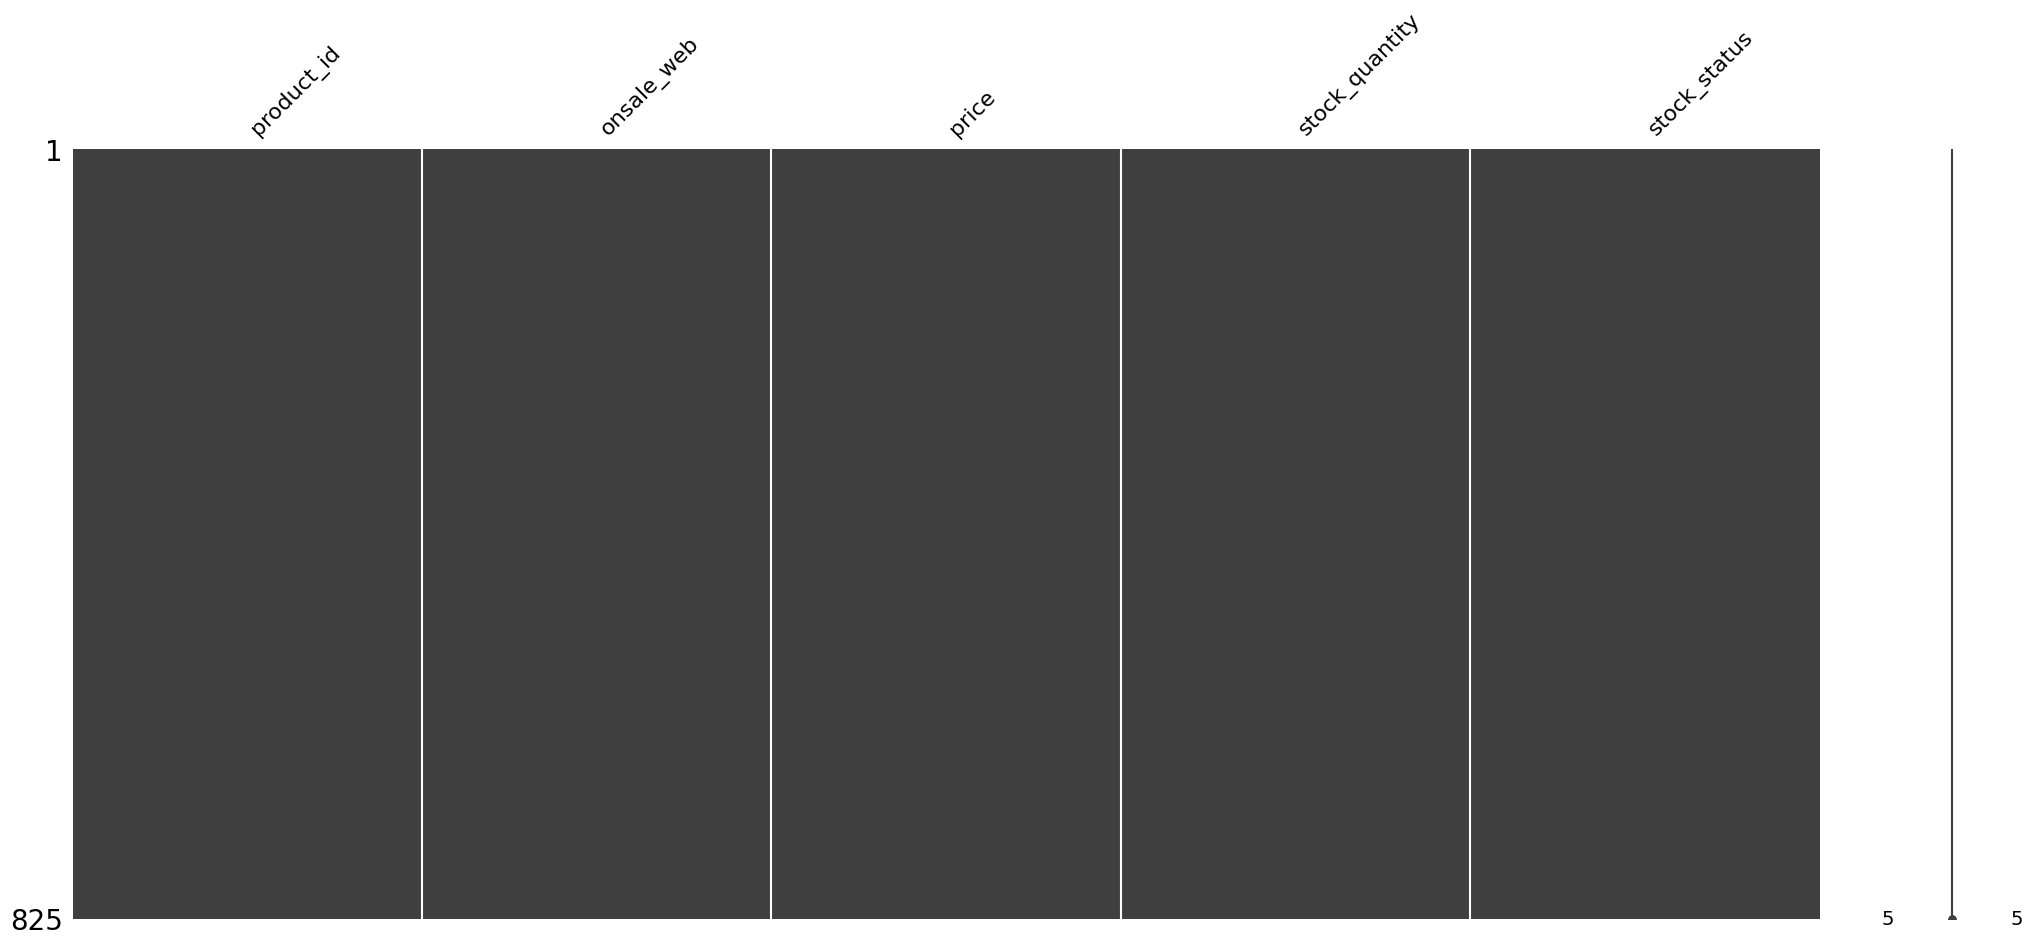

In [30]:
msno.matrix(erp_df)

<Axes: >

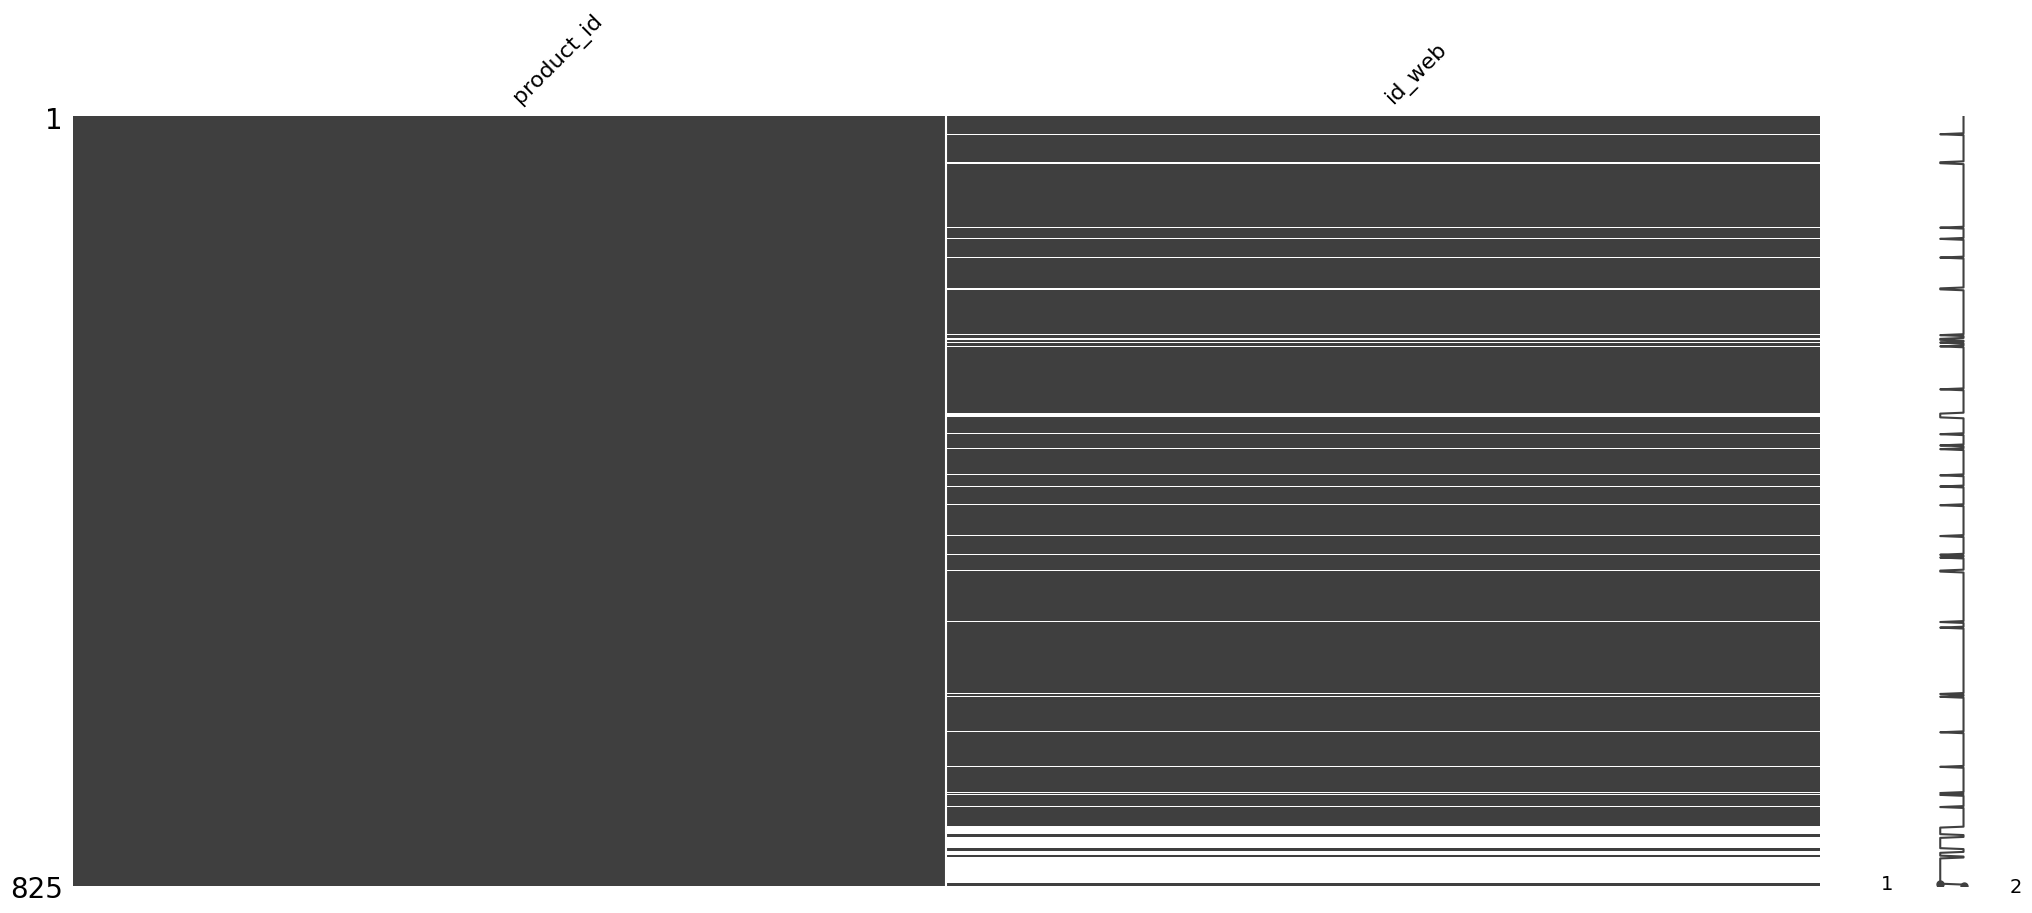

In [31]:
msno.matrix(liaisons_)

<Axes: >

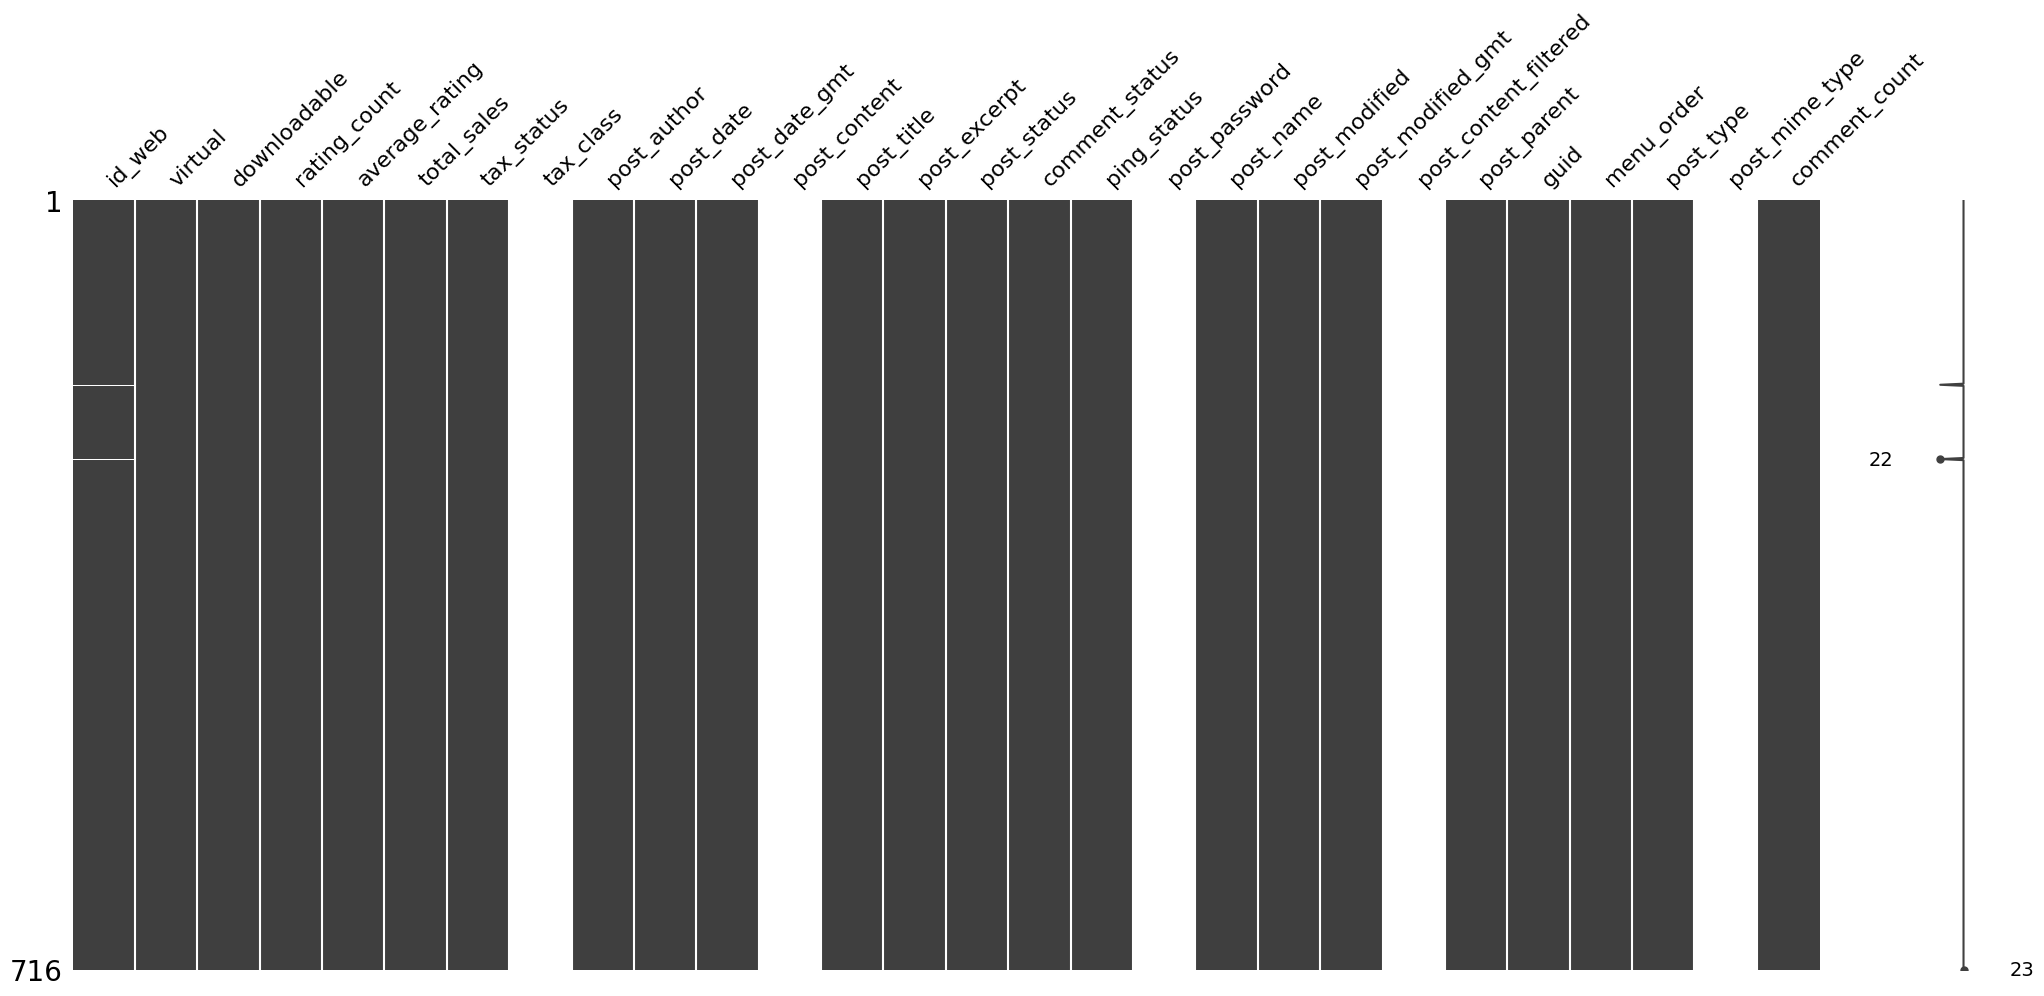

In [32]:
msno.matrix(web_df)

In [33]:
# suppression des colonnes vides
web_df = web_df.drop(['tax_class','post_content','post_password','post_content_filtered','post_mime_type'], axis=1)

<Axes: >

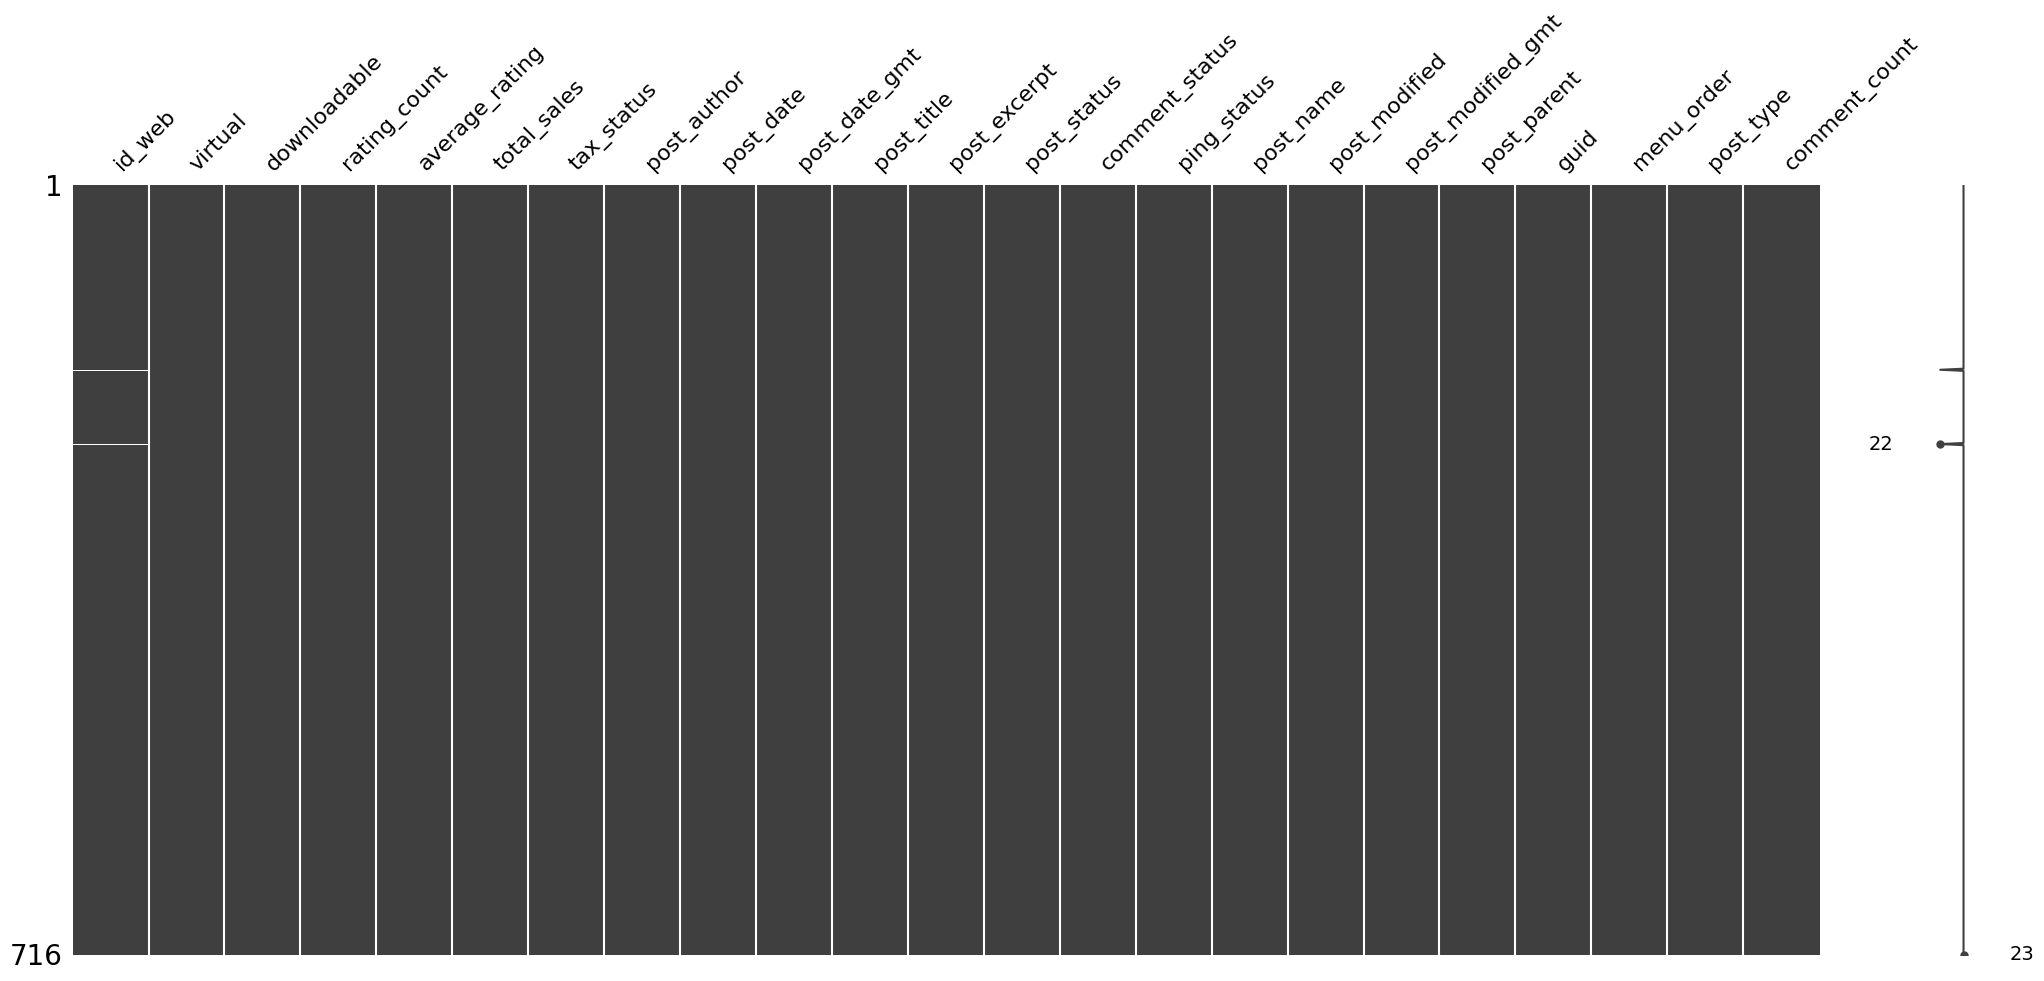

In [34]:
# Vérificiation visuelle avec le package missingno
msno.matrix(web_df)

In [35]:
web_df.loc[web_df['id_web'].isnull(),:]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
353,NaN,0,0,0,0.0,3.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,...,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
488,NaN,0,0,0,0.0,10.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,...,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


In [36]:
web_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 2 to 1510
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_web             714 non-null    object        
 1   virtual            716 non-null    int64         
 2   downloadable       716 non-null    int64         
 3   rating_count       716 non-null    int64         
 4   average_rating     716 non-null    float64       
 5   total_sales        716 non-null    float64       
 6   tax_status         716 non-null    object        
 7   post_author        716 non-null    float64       
 8   post_date          716 non-null    datetime64[ns]
 9   post_date_gmt      716 non-null    datetime64[ns]
 10  post_title         716 non-null    object        
 11  post_excerpt       716 non-null    object        
 12  post_status        716 non-null    object        
 13  comment_status     716 non-null    object        
 14  ping_status   

In [37]:
web_df = web_df.dropna(subset=['id_web'])

<Axes: >

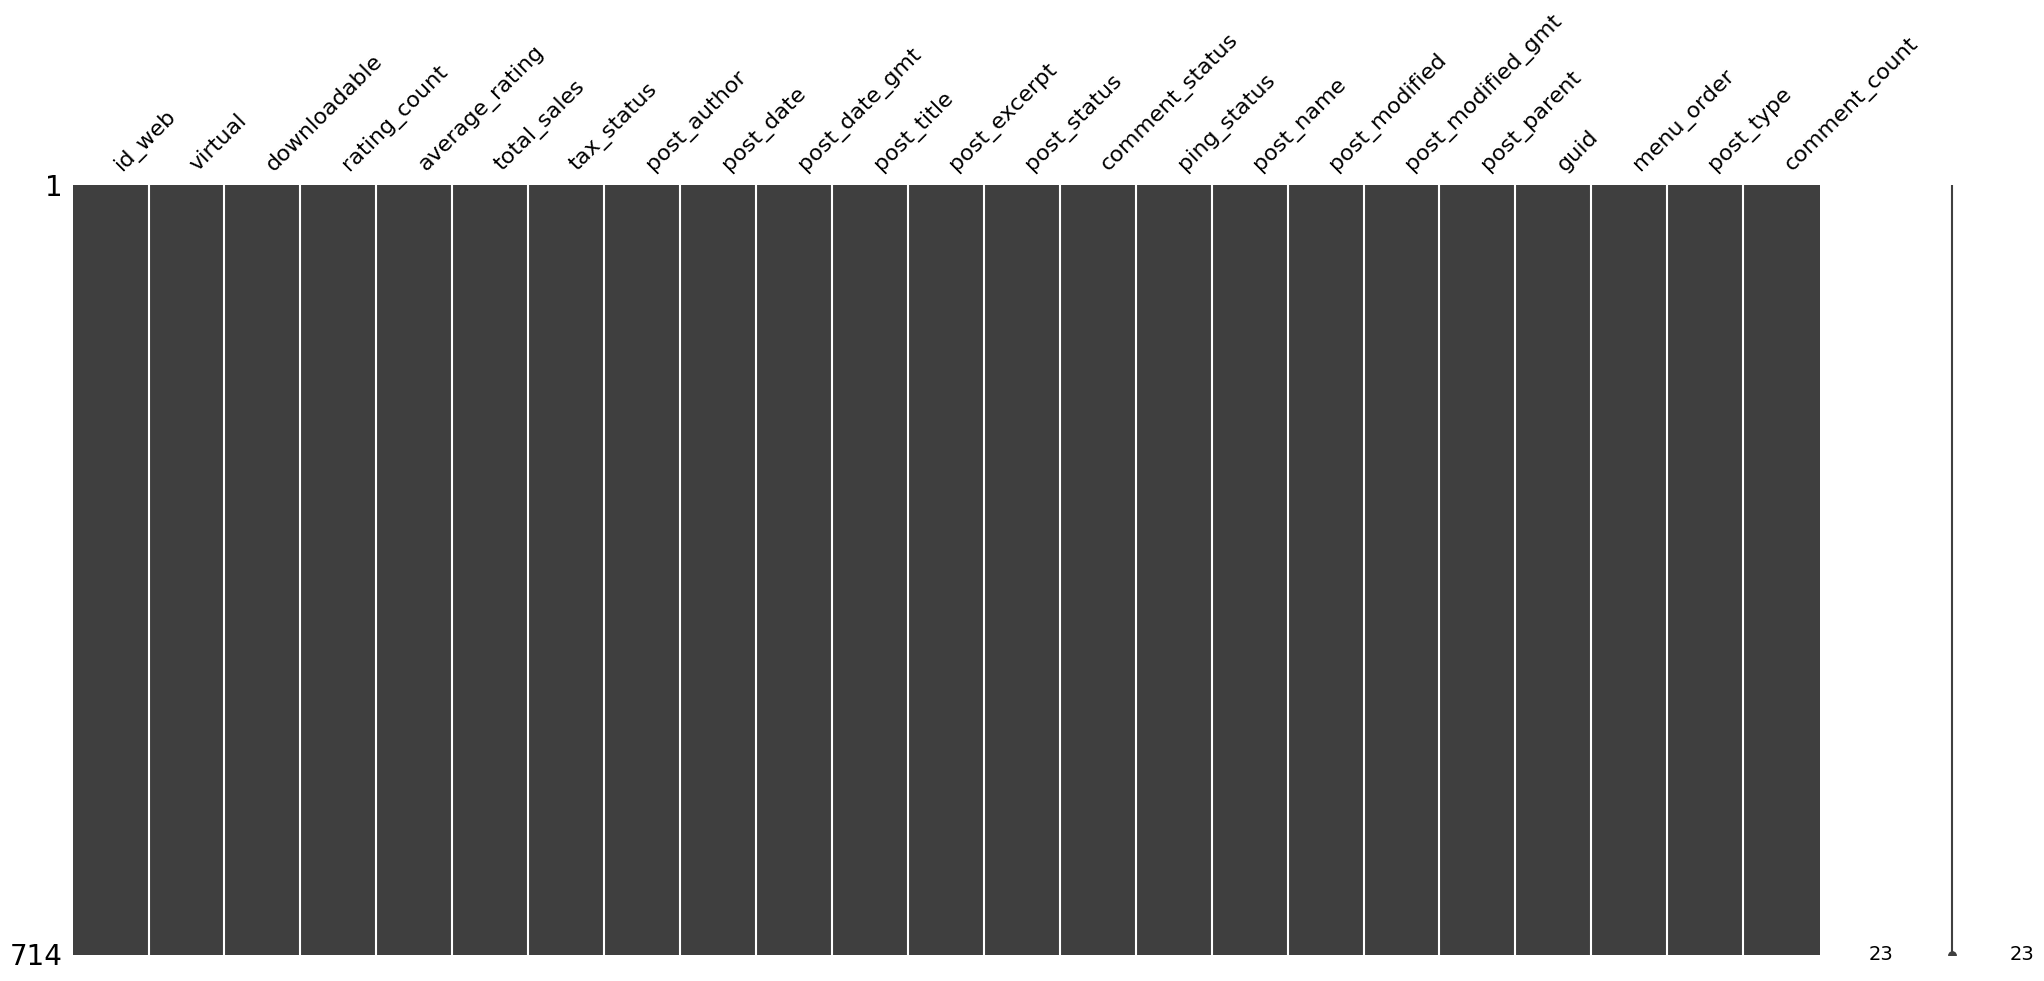

In [38]:
msno.matrix(web_df)

Jointure des 2 exports : ERP et CMS

In [39]:
merging_erp_web = erp_df.merge(liaisons_, how='inner', on='product_id')

In [40]:
merging_erp_web2 = merging_erp_web.merge(web_df, how='inner', on='id_web')

In [41]:
merging_erp_web2.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
4,4039,1,46.0,0,outofstock,19815,0,0,0,0.0,...,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


Visuel du dataframe nettoyé avec jointure

<Axes: >

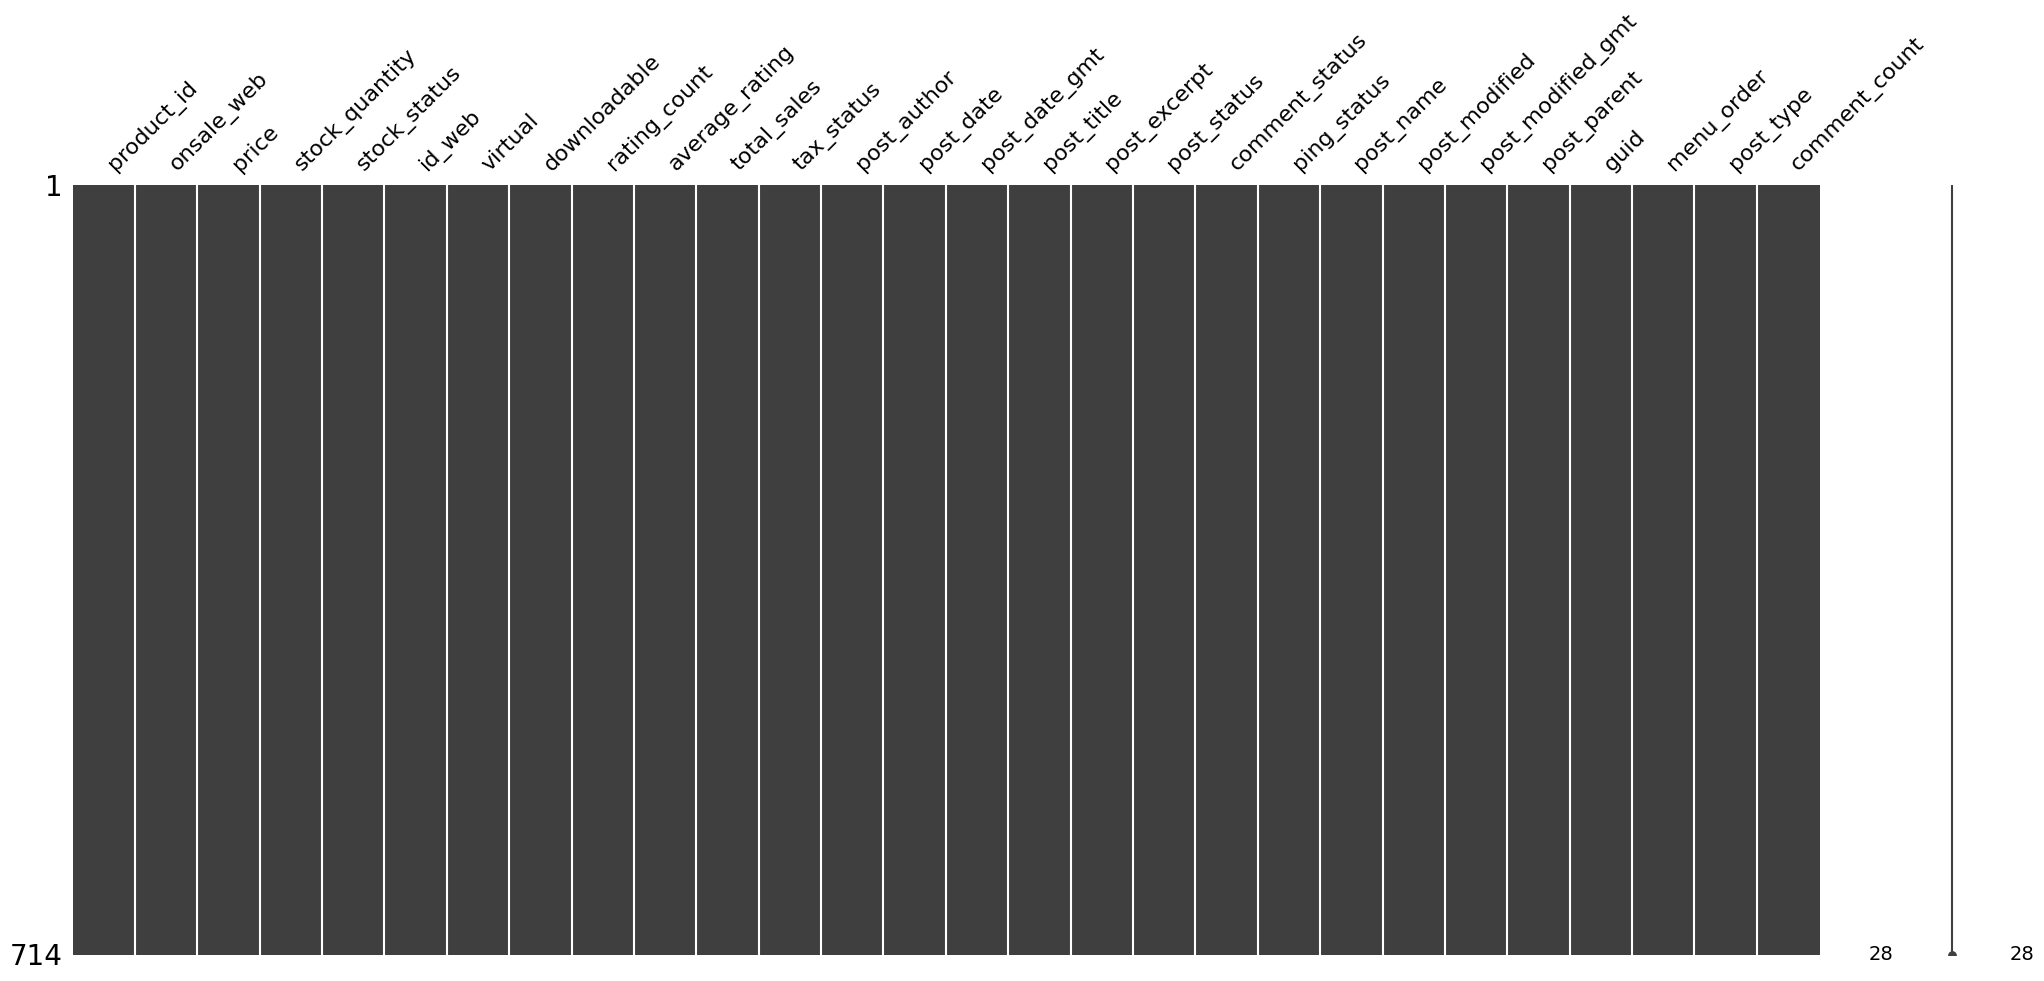

In [42]:
msno.matrix(merging_erp_web2)

In [43]:
merging_erp_web2.shape

(714, 28)

Calcul du chiffres d'affaires = 70 568,60 EUR

In [44]:
merging_erp_web2["C.A."] = (merging_erp_web2['price'] * merging_erp_web2['total_sales'])

In [45]:
CA_total = merging_erp_web2['C.A.'].sum().round(1)
CA_total

70568.6

Dataframe avec la colonne CA

<Axes: >

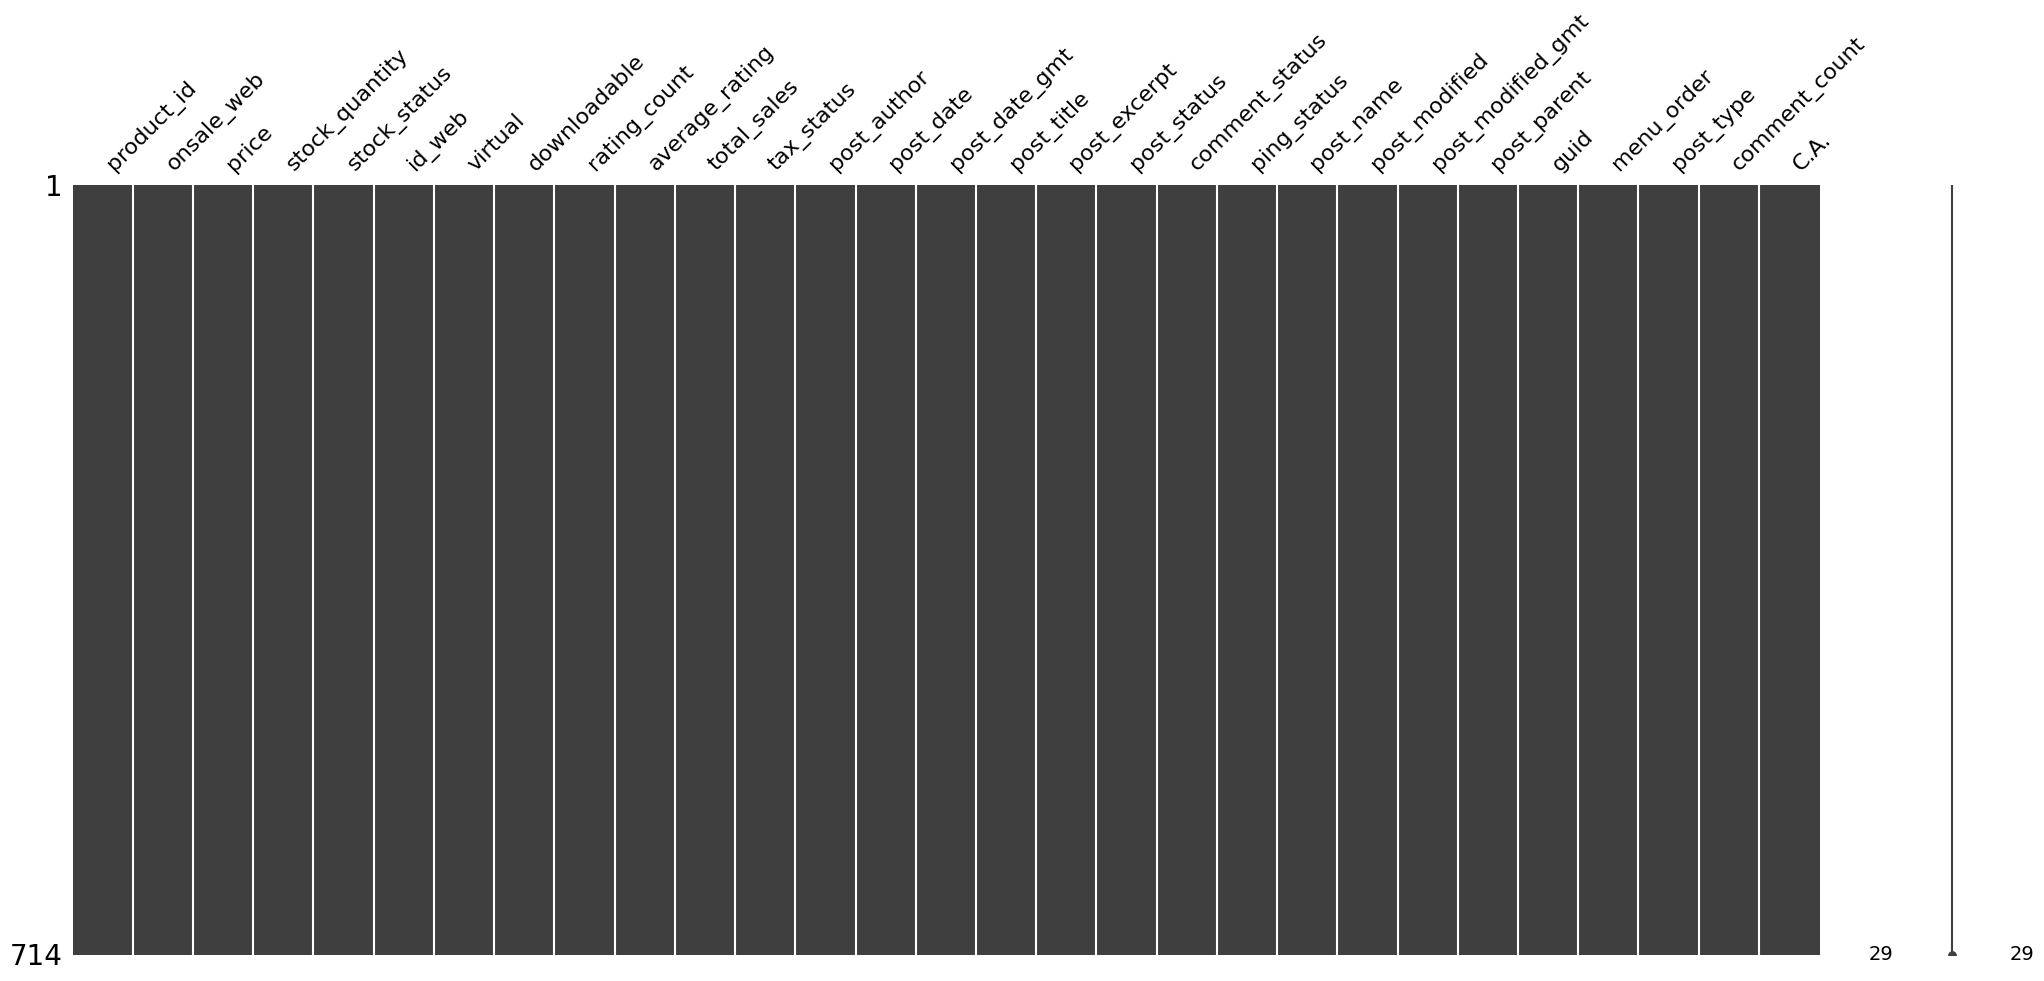

In [46]:
msno.matrix(merging_erp_web2)

Chiffres d'affaires par produit trié par ordre décroissant

In [47]:
ca_par_produit = merging_erp_web2[['post_name','price','C.A.']]
ca_par_produit.sort_values(by='C.A.', ascending=False).head(20)

,post_name,price,C.A.
194,champagne-gosset-grand-blanc-de-blanc,49.0,4704.0
71,champagne-gosset-grand-rose,49.0,4263.0
218,cognac-frapin-vip-xo,176.0,2288.0
70,champagne-gosset-grand-millesime-2006,53.0,1590.0
69,gosset-champagne-grande-reserve,39.0,1560.0
201,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,126.5,1391.5
199,champagne-egly-ouriet-grand-cru-millesime-2008,225.0,1125.0
79,elian-daros-cotes-du-marmandais-clos-baquey-2015,29.0,1044.0
651,domaine-giudicelli-patrimonio-blanc-2019,25.2,1033.2
30,gilles-robin-crozes-hermitage-papillon-2019,16.6,1029.2


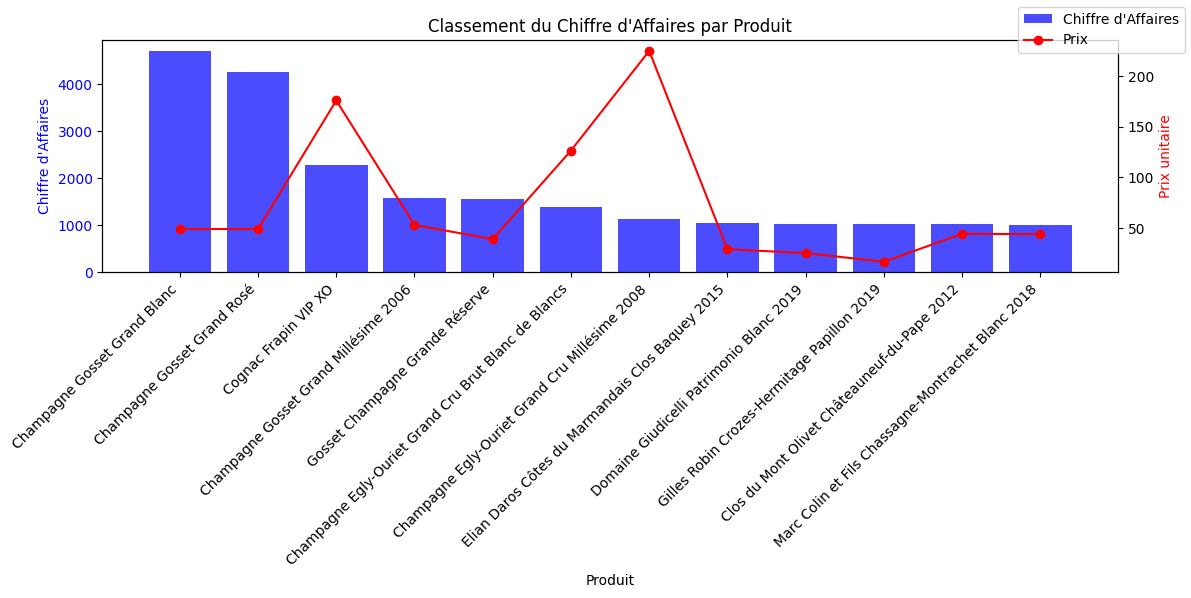

In [48]:
# Données
produits = [
    "Champagne Gosset Grand Blanc",
    "Champagne Gosset Grand Rosé",
    "Cognac Frapin VIP XO",
    "Champagne Gosset Grand Millésime 2006",
    "Gosset Champagne Grande Réserve",
    "Champagne Egly-Ouriet Grand Cru Brut Blanc de Blancs",
    "Champagne Egly-Ouriet Grand Cru Millésime 2008",
    "Elian Daros Côtes du Marmandais Clos Baquey 2015",
    "Domaine Giudicelli Patrimonio Blanc 2019",
    "Gilles Robin Crozes-Hermitage Papillon 2019",
    "Clos du Mont Olivet Châteauneuf-du-Pape 2012",
    "Marc Colin et Fils Chassagne-Montrachet Blanc 2018"
]
prix = [49.0, 49.0, 176.0, 53.0, 39.0, 126.5, 225.0, 29.0, 25.2, 16.6, 44.3, 43.9]
chiffre_affaires = [4704.0, 4263.0, 2288.0, 1590.0, 1560.0, 1391.5, 1125.0, 1044.0, 1033.2, 1029.2, 1018.9, 1009.7]

# Créer un DataFrame
df = pd.DataFrame({'Produit': produits, 'Prix': prix, 'Chiffre d\'Affaires': chiffre_affaires})

# Faire pivoter les noms de produits pour les rendre lisibles
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(df.index, df['Chiffre d\'Affaires'], color='b', alpha=0.7, label='Chiffre d\'Affaires')
ax.set_xlabel('Produit')
ax.set_ylabel('Chiffre d\'Affaires', color='b')
ax.tick_params(axis='y', labelcolor='b')
ax.set_xticks(df.index)
ax.set_xticklabels(df['Produit'], rotation=45, ha='right')

# Ajouter les prix comme des points sur le graphique
ax2 = ax.twinx()
ax2.plot(df.index, df['Prix'], color='r', marker='o', label='Prix')
ax2.set_ylabel('Prix unitaire', color='r')

# Titre et légende
plt.title('Classement du Chiffre d\'Affaires par Produit')
fig.tight_layout()
fig.legend(loc='upper right')

# Afficher le graphique
plt.show()


In [49]:
ca_par_produit.dtypes

post_name     object
price        float64
C.A.         float64
dtype: object

In [50]:
gosset_grand_blanc = ca_par_produit[ca_par_produit['C.A.'] == 4704]
gosset_grand_rose = ca_par_produit[ca_par_produit['C.A.'] == 4263]

# Convertir la colonne 'C.A.' de gosset_grand_rose en float
gosset_grand_rose['C.A.'] = gosset_grand_rose['C.A.'].astype(float)

# Calcule de la part des champagnes gosset par rapport au CA total 
part_du_CA_total = (((gosset_grand_blanc['C.A.'].values + gosset_grand_rose['C.A.'].values) / CA_total) * 100).round(1)

# Afficher la part du CA total
print(f"la part du chiffres d\'affaires des champagnes Gosset Grand Blanc et Grand Rosé est de {part_du_CA_total} %.")


la part du chiffres d'affaires des champagnes Gosset Grand Blanc et Grand Rosé est de [12.7] %.


C:\Users\nbous\AppData\Local\Temp\ipykernel_22484\2820164503.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gosset_grand_rose['C.A.'] = gosset_grand_rose['C.A.'].astype(float)


In [51]:
# Trier par ordre décroissant de prix
best_ca = ca_par_produit.sort_values(by='C.A.', ascending=False).head(10)


# Création du graphique à barres avec la palette de couleurs bordeaux
fig = px.bar(best_ca, x='post_name', y='C.A.', color='C.A.', 
             labels={'post_name': 'Vin', 'C.A.': 'chiffres d\'affaires'},
             color_discrete_sequence=px.colors.qualitative.Set3)  # Utilisation de la palette Set3

# Personnalisation du graphique
fig.update_layout(
    title='Chiffres d\'affaires classé par produit',
    xaxis_title='vin',
    yaxis_title='CA',
    legend_title='Légende',
    xaxis_tickangle=-45,
    showlegend=False
)

# Ajustement de la taille du graphique et des marges
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100)  # Ajustement des marges
)

# Affichage du graphique
fig.show()

### Analyse univariée : Prix et Outliers

Statistiques descriptives

In [52]:
merging_erp_web2[['price']].describe().round(2)

,price
count,714.00
mean,32.49
std,27.81
min,5.20
25%,14.10
50%,23.55
75%,42.18
max,225.00


### Distribution des prix

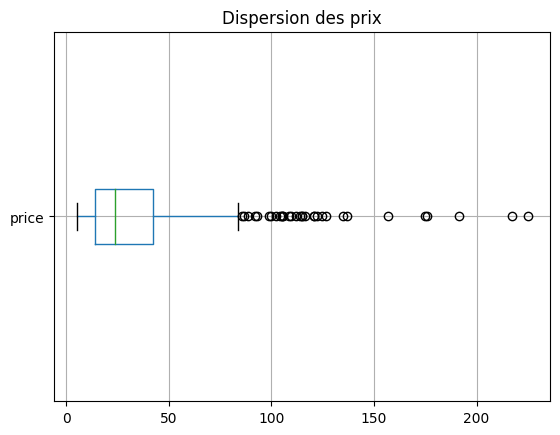

In [53]:
merging_erp_web2.boxplot(column="price", vert=False)
plt.title('Dispersion des prix')
plt.show()

### Outliers

1/ Méthode Interquartile (IQR) - NumPy

In [54]:
# Calculer les quartiles
Q1 = np.percentile(merging_erp_web2['price'], 25)
Q3 = np.percentile(merging_erp_web2['price'], 75)
IQR = Q3 - Q1

# Calculer les bornes des outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Trouver les outliers
outliers = merging_erp_web2[(merging_erp_web2['price'] < lower_bound) | (merging_erp_web2['price'] > upper_bound)]

print(f"IQR = {IQR:.2f}")
print(f"Seuil inférieur pour les outliers = {lower_bound:.2f}")
print(f"Seuil supérieur pour les outliers = {upper_bound:.2f}")
print("Outliers :")
print(outliers) # aucun prix en-dessous du seuil inférieur


IQR = 28.08
Seuil inférieur pour les outliers = -28.01
Seuil supérieur pour les outliers = 84.29
Outliers :
     product_id  onsale_web  price  stock_quantity stock_status id_web   
63         4115           1  100.0              11      instock  15382  \
65         4132           1   88.4               5      instock  11668   
199        4352           1  225.0               0   outofstock  15940   
201        4355           1  126.5               2      instock  12589   
205        4359           1   85.6               0   outofstock  13853   
218        4402           1  176.0               8      instock   3510   
219        4404           1  108.5               2      instock   3507   
221        4406           1  157.0               3      instock   7819   
222        4407           1  104.0               6      instock   3509   
227        4582           1  109.6               7      instock  12857   
380        4903           1  102.3              20      instock  14805   
381 

2/ Calcul Interquartile classique

In [55]:
# Données fournies
Q1 = merging_erp_web2['price'].quantile(0.25).round(2)
Q3 = merging_erp_web2['price'].quantile(0.75).round(2)
IQR = Q3 - Q1

# Seuils pour les outliers
lower_bound = Q1 - 1.5 * IQR # juste pour information, mais nous n'avons pas de prix négatif
seuil = Q3 + 1.5 * IQR

# Données
data = merging_erp_web2['price']

# Trouver les outliers
outliers = [val for val in data if val > seuil]
not_outliers = [val for val in data if val < seuil]

print(f"Seuil supèrieur = {seuil :.2f}")
print(f"Seuil infèrieur = {lower_bound :.2f}")
print(f"Outliers : {outliers}")
print(f"not_outliers: {not_outliers}")


Seuil supèrieur = 84.30
Seuil infèrieur = -28.02
Outliers : [100.0, 88.4, 225.0, 126.5, 85.6, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]
not_outliers: [24.2, 34.3, 20.8, 14.1, 46.0, 34.3, 32.7, 31.2, 60.0, 42.6, 80.0, 18.3, 22.8, 19.3, 21.8, 7.7, 33.7, 44.3, 71.6, 12.7, 8.7, 8.7, 8.7, 11.9, 11.9, 14.5, 14.4, 19.5, 20.8, 22.0, 16.6, 60.0, 23.4, 33.2, 32.0, 77.8, 12.7, 14.7, 14.05, 22.9, 44.0, 37.0, 39.0, 17.0, 23.2, 19.0, 16.4, 14.4, 13.7, 12.6, 22.8, 12.8, 22.1, 12.8, 15.8, 15.8, 16.3, 16.3, 9.7, 6.8, 12.6, 35.0, 31.7, 23.0, 29.8, 25.7, 77.4, 39.0, 53.0, 49.0, 29.5, 33.0, 37.5, 69.0, 59.0, 13.7, 19.2, 29.0, 9.8, 14.5, 20.35, 12.0, 18.5, 9.3, 9.3, 11.6, 14.3, 10.8, 7.6, 12.0, 20.5, 14.3, 18.2, 9.0, 7.8, 5.7, 5.7, 5.7, 13.5, 13.5, 11.5, 24.0, 24.0, 11.9, 16.7, 21.4, 16.6, 13.3, 9.5, 12.1, 9.3, 17.8, 13.5, 10.8, 27.2, 9.4, 5.8, 5.8, 38.0, 38.0, 9.9,

3/ Méthode interquartile avec package scipy

In [56]:
from scipy.stats import iqr

# Calculer l'IQR
data = merging_erp_web2['price']
iqr_value = iqr(data)

# Calculer les bornes des outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
lower_bound = Q1 - 1.5 * iqr_value
upper_bound = Q3 + 1.5 * iqr_value

# Trouver les outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

print(f"IQR = {iqr_value:.2f}")
print(f"Borne inférieure pour les outliers = {lower_bound:.2f}")
print(f"Borne supérieure pour les outliers = {upper_bound:.2f}")
print(f"Outliers : {outliers.tolist()}")


IQR = 28.08
Borne inférieure pour les outliers = -28.01
Borne supérieure pour les outliers = 84.29
Outliers : [100.0, 88.4, 225.0, 126.5, 85.6, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


Visuel avec Matplotlib

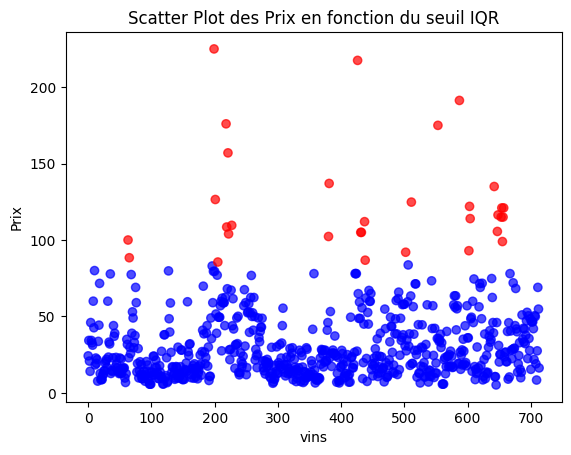

In [57]:
# Données fournies
Q1 = merging_erp_web2['price'].quantile(0.25).round(2)
Q3 = merging_erp_web2['price'].quantile(0.75).round(2)
IQR = Q3 - Q1

# Seuils pour les outliers
seuil = Q3 + 1.5 * IQR

# Données (remplacez cela par vos données)
data = merging_erp_web2['price']

# Initialisation des listes pour les couleurs
colors = []

# Attribution des couleurs en fonction de la position par rapport au seuil
for val in data:
    if val > seuil:
        colors.append('red')  # Au-dessus du seuil
    else:
        colors.append('blue')  # En-dessous du seuil

# Création du scatter plot
plt.scatter(range(len(data)), data, color=colors, alpha=0.7)

# Ajout des étiquettes
plt.xlabel('vins')
plt.ylabel('Prix')
plt.title('Scatter Plot des Prix en fonction du seuil IQR')

# Affichage du graphique
plt.show()


Visuel avec Plotly

In [58]:
# Données fournies
Q1 = merging_erp_web2['price'].quantile(0.25).round(2)
Q3 = merging_erp_web2['price'].quantile(0.75).round(2)
IQR = Q3 - Q1

# Seuils pour les outliers
seuil = Q3 + 1.5 * IQR

print(IQR)
print(seuil)


# Données (remplacez cela par vos données)
data = merging_erp_web2

# Attribution des couleurs en fonction de la position par rapport au seuil
colors = ['> IQR' if val > seuil else '< IQR' for val in data['price']]

# Création du scatter plot avec Plotly
fig = px.scatter(data, x=data.index, y='price', color=colors, labels={'color': 'Position par rapport au seuil de 84,30'})

# Personnalisation du graphique
fig.update_traces(marker=dict(size=5, opacity=0.7))
fig.update_layout(
    title='Dispersion des Prix en fonction du seuil Interquartile',
    xaxis_title='Index',
    yaxis_title='Prix'
)

# Affichage du graphique
fig.show()


28.08
84.3


In [59]:
# Données fournies
Q1 = merging_erp_web2['price'].quantile(0.25).round(2)
Q3 = merging_erp_web2['price'].quantile(0.75).round(2)
IQR = Q3 - Q1

# Seuils pour les outliers
seuil = Q3 + 1.5 * IQR

# Données
data = merging_erp_web2

# Sélectionnez les vins au-dessus du seuil
above_threshold = data[data['price'] > seuil]

# Trier par ordre décroissant de prix
above_threshold = above_threshold.sort_values(by='price', ascending=False).head(10)

# Création du graphique à barres avec la palette de couleurs bordeaux
fig = px.bar(above_threshold, x='post_name', y='price', color='price', 
             labels={'post_name': 'Nom du Vin', 'price': 'Prix'},
             color_discrete_sequence=px.colors.qualitative.Set3)  # Utilisation de la palette Set3

# Personnalisation du graphique
fig.update_layout(
    title='Vins de prestige au-dessus du seuil IQR (Triés par Prix décroissant)',
    xaxis_title='Nom du Vin',
    yaxis_title='Prix',
    legend_title='Vin',
    xaxis_tickangle=-45,
    showlegend=False
)

# Ajustement de la taille du graphique et des marges
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100)  # Ajustement des marges
)

# Affichage du graphique
fig.show()


In [60]:
above_threshold = len(data[data['price'] > seuil])
print(f"Il y a {above_threshold} outliers (valeurs atypiques).")

Il y a 32 outliers (valeurs atypiques).


A/ Z-SCORE

1/ Méthode classique

In [61]:
# Calculer le Z-score
mean = merging_erp_web2['price'].mean()
std_ = merging_erp_web2['price'].std()

merging_erp_web2['Z-Score'] = (merging_erp_web2['price'] - mean) / std_

# Définir un seuil de 2 pour identifier les valeurs aberrantes
threshold = 2
outliers = merging_erp_web2[abs(merging_erp_web2['Z-Score']) > threshold]

top_outliers_ = outliers[['post_name', 'price', 'Z-Score']].sort_values(by='Z-Score', ascending=False).head(32)
top_outliers_

,post_name,price,Z-Score
199,champagne-egly-ouriet-grand-cru-millesime-2008,225.0,6.922087
426,david-duband-charmes-chambertin-grand-cru-2014,217.5,6.652405
587,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,191.3,5.710315
218,cognac-frapin-vip-xo,176.0,5.160164
553,camille-giroud-clos-de-vougeot-2016,175.0,5.124206
221,cognac-frapin-chateau-de-fontpinot-1989-20-ans,157.0,4.476969
381,domaine-des-croix-corton-charlemagne-grand-cru...,137.0,3.757817
642,champagne-gosset-celebris-vintage-2007,135.0,3.685902
201,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,126.5,3.380262
511,domaine-weinbach-gewurztraminer-gc-furstentum-...,124.8,3.319134


In [62]:
len(top_outliers_)

30

30 vins représentent des valeurs atypiques

2/ Méthode package Scikit Learn

In [63]:
from sklearn.preprocessing import StandardScaler
# Créer un objet StandardScaler
scaler = StandardScaler()
# Calculer les Z-scores
merging_erp_web2['Z-Score'] = scaler.fit_transform(merging_erp_web2[['price']])

# Définir un seuil de 2 pour identifier les valeurs aberrantes
threshold = 2
outliers = merging_erp_web2[abs(merging_erp_web2['Z-Score']) > threshold]

top_outliers = outliers[['post_name', 'price', 'Z-Score']].sort_values(by='Z-Score', ascending=False)
top_outliers

,post_name,price,Z-Score
199,champagne-egly-ouriet-grand-cru-millesime-2008,225.0,6.926939
426,david-duband-charmes-chambertin-grand-cru-2014,217.5,6.657068
587,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,191.3,5.714318
218,cognac-frapin-vip-xo,176.0,5.163781
553,camille-giroud-clos-de-vougeot-2016,175.0,5.127798
221,cognac-frapin-chateau-de-fontpinot-1989-20-ans,157.0,4.480108
381,domaine-des-croix-corton-charlemagne-grand-cru...,137.0,3.760451
642,champagne-gosset-celebris-vintage-2007,135.0,3.688486
201,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,126.5,3.382632
511,domaine-weinbach-gewurztraminer-gc-furstentum-...,124.8,3.321461


3/ Méthode avec le package scipy

In [64]:
from scipy.stats import zscore

# Calculer les Z-scores
merging_erp_web2['Z-Score'] = zscore(merging_erp_web2['price'])

# Définir un seuil de 2 pour identifier les valeurs aberrantes
threshold = 2
outliers = merging_erp_web2[abs(merging_erp_web2['Z-Score']) > threshold]

top_32_outliers = outliers[['post_name', 'price', 'Z-Score']].sort_values(by='Z-Score', ascending=False).head(32)
top_32_outliers

,post_name,price,Z-Score
199,champagne-egly-ouriet-grand-cru-millesime-2008,225.0,6.926939
426,david-duband-charmes-chambertin-grand-cru-2014,217.5,6.657068
587,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,191.3,5.714318
218,cognac-frapin-vip-xo,176.0,5.163781
553,camille-giroud-clos-de-vougeot-2016,175.0,5.127798
221,cognac-frapin-chateau-de-fontpinot-1989-20-ans,157.0,4.480108
381,domaine-des-croix-corton-charlemagne-grand-cru...,137.0,3.760451
642,champagne-gosset-celebris-vintage-2007,135.0,3.688486
201,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,126.5,3.382632
511,domaine-weinbach-gewurztraminer-gc-furstentum-...,124.8,3.321461


Z-Score Boxplot - Détermination du seuil

<Axes: >

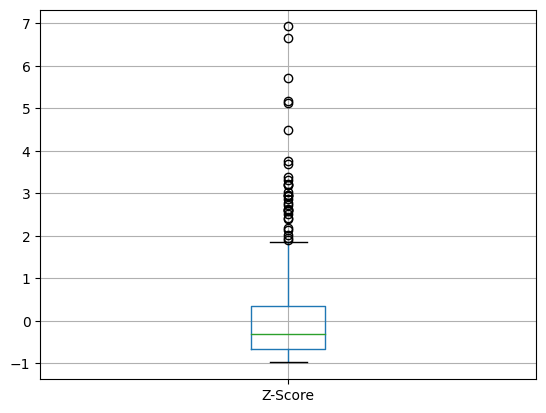

In [65]:
merging_erp_web2[['Z-Score']].boxplot()

In [70]:

# Sélectionnez les colonnes nécessaires
outliers_data = outliers[['post_name', 'Z-Score']]

# Trier les données en ordre décroissant selon le Z-Score
outliers_data = outliers_data.sort_values(by='Z-Score', ascending=False).head(15)

# Créer un graphique interactif
fig = px.bar(outliers_data, x='Z-Score', y='post_name', orientation='h', text='Z-Score',
             labels={'post_name': 'Vins', 'Z-Score': 'Z-Score'},
             title='Classement du Z-Score des Outliers')

# Ajuster la taille de la police
fig.update_layout(font=dict(size=10))

# Afficher le graphique
fig.show()


 Analyses complémentaires

In [82]:
best_sales = merging_erp_web2.groupby(['post_title','price']).agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head(20)
best_sales

,,total_sales
post_title,price,
Champagne Gosset Grand Blanc de Blancs,49.0,96.0
Champagne Gosset Grand Rosé,49.0,87.0
Gilles Robin Crozes-Hermitage Rouge Papillon 2019,16.6,62.0
Moulin de Gassac IGP Pays d'Hérault Guilhem Rosé 2019,5.8,46.0
Maurel Pays d'Oc Chardonnay 2019,5.7,43.0
Le Pas de l'Escalette Languedoc Les Petits Pas 2019,13.3,42.0
Domaine Giudicelli Patrimonio Blanc 2019,25.2,41.0
Champagne Gosset Grande Réserve,39.0,40.0
Emile Boeckel Crémant Brut Blanc de Blancs,8.6,38.0


In [90]:
# Trier les données par total_sales pour obtenir les meilleures ventes des valeurs atypiques
vins_les_plus_chers = merging_erp_web2[['post_title','price','total_sales']].sort_values(by='price', ascending=False)
vins_les_plus_chers = vins_les_plus_chers[vins_les_plus_chers['price'] > 84]
vins_les_plus_chers.sort_values(by='total_sales', ascending=False)

,post_title,price,total_sales
218,Cognac Frapin VIP XO,176.0,13.0
201,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,11.0
199,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,5.0
381,Domaine Des Croix Corton Charlemagne Grand Cru...,137.0,5.0
587,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3,3.0
653,Domaine des Comtes Lafon Volnay 1er Cru Santen...,115.0,2.0
219,Cognac Frapin Château de Fontpinot XO,108.5,2.0
642,Champagne Gosset Célébris Vintage 2007,135.0,2.0
222,Cognac Frapin Cigar Blend,104.0,1.0
205,Champagne Larmandier-Bernier Grand Cru Les Che...,85.6,1.0


In [91]:
# compter les lignes dont les valeurs ne sont pas des zéros
np.count_nonzero(vins_les_plus_chers['total_sales'])

10

10 vins prestigieux représentent des ventes

In [97]:
import plotly.graph_objects as go

# Sélectionner les 10 meilleures ventes
top_10_sales = vins_les_plus_chers.sort_values(by='total_sales', ascending=False).head(10)

# Créer le graphique
fig = go.Figure()

# Créer une liste de couleurs en fonction de la meilleure vente
colors = ['red' if row.equals(top_10_sales.iloc[0]) else 'green' for _, row in top_10_sales.iterrows()]

# Ajouter les barres pour les meilleures ventes
fig.add_trace(go.Bar(
    x=top_10_sales['post_title'],
    y=top_10_sales['total_sales'],
    marker_color=colors,
    textposition='outside'
))

# Mise en page du graphique
fig.update_layout(
    title='Classement des meilleures Ventes parmi les Outliers',
    xaxis_title='Nom du Vin',
    yaxis_title='Ventes Totales',
    xaxis_tickangle=-45,  # Inclinaison des étiquettes pour une meilleure lisibilité
    font=dict(size=10)  # Réduire la taille de la police
)

# Affichage du graphique
fig.show()
